# Análise do *dataset Brazilian Cities*

## Imports iniciais

Importando as ferramentas que iremos utilizar, em sua maioria do *sciklt-learn*

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

/home/viniss/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('./dataset/BRAZIL_CITIES.csv', sep=';')

df.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0


## Análise inicial

- Possui valores nulos
- Possui muitos campos
- Possui outliers
- Talvez seja interessante normalizar os dados

In [5]:
# Pegando algumas informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5573 non-null   object 
 1   STATE                   5573 non-null   object 
 2   CAPITAL                 5573 non-null   int64  
 3   IBGE_RES_POP            5565 non-null   float64
 4   IBGE_RES_POP_BRAS       5565 non-null   float64
 5   IBGE_RES_POP_ESTR       5565 non-null   float64
 6   IBGE_DU                 5563 non-null   float64
 7   IBGE_DU_URBAN           5563 non-null   float64
 8   IBGE_DU_RURAL           5492 non-null   float64
 9   IBGE_POP                5565 non-null   float64
 10  IBGE_1                  5565 non-null   float64
 11  IBGE_1-4                5565 non-null   float64
 12  IBGE_5-9                5565 non-null   float64
 13  IBGE_10-14              5565 non-null   float64
 14  IBGE_15-59              5565 non-null   

In [6]:
df.describe()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,5573.000000,5.565000e+03,5.565000e+03,5565.000000,5.563000e+03,5.563000e+03,5492.000000,5.565000e+03,5565.000000,5565.000000,...,3342.000000,3.342000e+03,3.342000e+03,5.562000e+03,5.562000e+03,5562.000000,125.0,166.000000,102.000000,5453.000000
mean,0.004845,3.427777e+04,3.420027e+04,77.504582,1.030272e+04,8.858756e+03,1462.635834,2.759466e+04,383.276011,1544.531177,...,1.579892,9.180012e+09,6.005096e+09,9.859429e+03,4.878615e+03,5.753686,1.0,4.277108,2.058824,2.080690
std,0.069442,2.031126e+05,2.014905e+05,1795.878554,6.477671e+04,6.437035e+04,1694.129156,1.859579e+05,2326.808921,9253.090298,...,0.952661,3.585797e+11,1.503829e+11,9.188694e+04,2.094391e+04,55.380274,0.0,11.772400,3.391380,4.417843
min,0.000000,8.050000e+02,8.050000e+02,0.000000,2.390000e+02,6.000000e+01,3.000000,1.740000e+02,0.000000,5.000000,...,0.000000,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,0.000000,1.0,1.000000,1.000000,1.000000
25%,0.000000,5.235000e+03,5.230000e+03,0.000000,1.572500e+03,8.740000e+02,487.000000,2.801000e+03,38.000000,158.000000,...,1.000000,0.000000e+00,4.047070e+07,6.020000e+02,5.910000e+02,0.000000,1.0,1.000000,1.000000,1.000000
50%,0.000000,1.093400e+04,1.092600e+04,0.000000,3.174000e+03,1.846000e+03,931.000000,6.170000e+03,92.000000,376.000000,...,2.000000,3.231032e+07,1.339124e+08,1.438500e+03,1.285000e+03,0.000000,1.0,2.000000,1.000000,1.000000
75%,0.000000,2.342400e+04,2.339000e+04,10.000000,6.726000e+03,4.624000e+03,1832.500000,1.530200e+04,232.000000,951.000000,...,2.000000,1.148333e+08,4.969605e+08,4.086000e+03,3.294500e+03,1.000000,1.0,3.000000,1.750000,2.000000
max,1.000000,1.125350e+07,1.113378e+07,119727.000000,3.576148e+06,3.548433e+06,33809.000000,1.046364e+07,129464.000000,514794.000000,...,8.000000,1.947077e+13,8.016164e+12,5.740995e+06,1.134570e+06,3236.000000,1.0,130.000000,26.000000,225.000000


<Axes: >

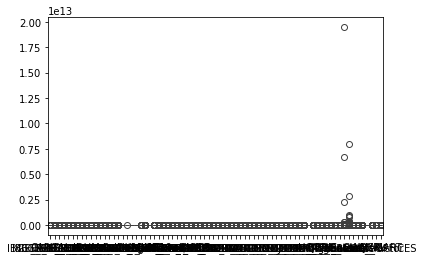

In [7]:
sns.boxplot(df)

 ## Pré-processamento

 Algumas funções de pré-processamento para este dataset


### Removendo colunas com alta correlação com o atributo alvo

In [8]:
df = df.drop(columns=['IDHM Ranking 2010', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao'])

### Funções de pré-processamento

In [9]:
# Transformando dados não-numéricos em numéricos

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['STATE'] = label_encoder.fit_transform(df['STATE'])
df['CITY'] = label_encoder.fit_transform(df['CITY'])
df['RURAL_URBAN'] = label_encoder.fit_transform(df['RURAL_URBAN'])
df['GVA_MAIN'] = label_encoder.fit_transform(df['GVA_MAIN'])
df['CATEGORIA_TUR'] = label_encoder.fit_transform(df['CATEGORIA_TUR'])
df['AREA'] = df['AREA'].str.replace(',', '')
df['AREA'] = df['AREA'].astype(float)
df = df.drop(columns='REGIAO_TUR')

In [10]:
from sklearn.impute import SimpleImputer

def impute_values(dataset: pd.DataFrame) -> pd.DataFrame:

  imputer = SimpleImputer(missing_values=np.nan, strategy='median')
  output = imputer.fit_transform(dataset)

  return pd.DataFrame(output, columns=dataset.columns)

In [11]:
def remove_outliers(dataset: pd.DataFrame) -> pd.DataFrame:

  q1 = dataset.quantile(.25)
  q3 = dataset.quantile(.75)
  iqr = q3 - q1

  l_lim = q1 - (iqr * 1.5)
  h_lim = q3 + (iqr * 1.5)

  i = 0

  for cols in dataset.columns:
    dataset.loc[dataset[cols] < l_lim[i], cols] = l_lim[i]
    dataset.loc[dataset[cols] > h_lim[i], cols] = h_lim[i]
    i += 1

  return dataset

In [12]:
from sklearn.preprocessing import MinMaxScaler

def normalize(dataset: pd.DataFrame) -> pd.DataFrame:

  output = MinMaxScaler().fit_transform(dataset)

  return pd.DataFrame(output, columns=dataset.columns)

/tmp/ipykernel_5248/3429921793.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset.loc[dataset[cols] < l_lim[i], cols] = l_lim[i]
/tmp/ipykernel_5248/3429921793.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset.loc[dataset[cols] > h_lim[i], cols] = h_lim[i]
/tmp/ipykernel_5248/3429921793.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset.loc[dataset[cols] < l_lim[i], cols] = l_lim[i]
/tmp/ipykernel_5248

<Axes: >

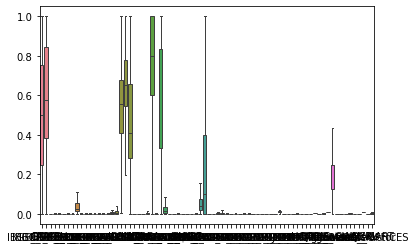

In [13]:
df_imputed = impute_values(df)
df_norm = normalize(df_imputed)
df_out = remove_outliers(df_imputed)
df_preprocessed = remove_outliers(df_norm)

sns.boxplot(df_preprocessed)

In [14]:
df_preprocessed.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,0.000000,0.307692,0.0,0.000540,0.000545,0.000000,0.000531,0.000419,0.017393,0.000490,...,0.2500,0.000002,0.000017,0.000376,0.001095,0.0,0.0,0.007752,0.0,0.000000
1,0.000189,0.384615,0.0,0.000524,0.000530,0.000000,0.000584,0.000400,0.024966,0.000380,...,0.2500,0.000002,0.000017,0.000388,0.001003,0.0,0.0,0.007752,0.0,0.000000
2,0.000378,0.307692,0.0,0.001329,0.001330,0.000209,0.001235,0.000894,0.041975,0.001002,...,0.1250,0.000002,0.000008,0.000494,0.001253,0.0,0.0,0.007752,0.0,0.008929
3,0.000755,0.384615,0.0,0.001945,0.001966,0.000000,0.002085,0.001862,0.030290,0.001748,...,0.2500,0.000002,0.000046,0.001206,0.002599,0.0,0.0,0.007752,0.0,0.011161
4,0.000566,0.500000,0.0,0.004428,0.004473,0.000209,0.003970,0.002865,0.112081,0.003235,...,0.4375,0.000004,0.000046,0.000919,0.006469,0.0,0.0,0.007752,0.0,0.004464


### Analisando correlação das variáveis

In [15]:
df.corr()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
CITY,1.000000,0.039887,-0.000601,0.012500,0.012409,0.021393,0.013640,0.013918,-0.008128,0.012043,...,0.006145,0.026087,-0.012428,0.011962,0.008858,0.023569,NaN,0.102560,0.065632,0.007956
STATE,0.039887,1.000000,-0.016549,0.012768,0.012598,0.030644,0.019103,0.025680,-0.241295,0.021723,...,0.063234,0.029877,-0.013132,0.045112,0.016946,0.073422,NaN,-0.003377,-0.212468,-0.017063
CAPITAL,-0.000601,-0.016549,1.000000,0.567152,0.568763,0.331483,0.554469,0.554671,0.178174,0.568855,...,0.183680,0.210324,0.331105,0.484210,0.597414,0.371637,NaN,0.423758,0.536376,0.561167
IBGE_RES_POP,0.012500,0.012768,0.567152,1.000000,0.999993,0.904065,0.998566,0.997830,0.339408,0.997886,...,0.262782,0.765281,0.494975,0.965387,0.938516,0.791112,NaN,0.966586,0.353548,0.917967
IBGE_RES_POP_BRAS,0.012409,0.012598,0.568763,0.999993,1.000000,0.902430,0.998474,0.997726,0.340186,0.997858,...,0.263505,0.763494,0.495447,0.964815,0.938808,0.790349,NaN,0.965960,0.355059,0.917943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wheeled_tractor,0.023569,0.073422,0.371637,0.791112,0.790349,0.800211,0.792866,0.792512,0.243280,0.802567,...,0.205729,0.766216,0.437241,0.854118,0.773876,1.000000,NaN,0.835007,0.286894,0.779839
UBER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAC,0.102560,-0.003377,0.423758,0.966586,0.965960,0.964885,0.972067,0.971832,0.546662,0.967601,...,0.656850,0.843646,0.498733,0.977247,0.912330,0.835007,NaN,1.000000,0.240857,0.956133
WAL-MART,0.065632,-0.212468,0.536376,0.353548,0.355059,0.180277,0.352907,0.355110,0.035665,0.326100,...,0.317423,0.131690,0.060012,0.277322,0.286128,0.286894,NaN,0.240857,1.000000,0.360982


In [17]:
df_preprocessed_complete = df_preprocessed.copy()

# eliminando atributos com correlação com o atributo alvo menor que 0.1
df_preprocessed_complete = df_preprocessed_complete.drop(columns=['UBER', 'COMP_T', 'ALT', 'Pr_Assets', 'Pu_Assets', 'COMP_U', 'COMP_J', 'COMP_K', 'IBGE_RES_POP_ESTR', 'COMP_D', 'WAL-MART'])

df_preprocessed_complete.corr()

df_preprocessed_complete = df_preprocessed_complete.drop(columns=['MAC', 'BEDS', 'HOTELS', 'Pr_Agencies', 'Pr_Bank', 'CAPITAL', 'Pu_Bank', 'CITY'])

df_preprocessed_complete.corr()

,STATE,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,...,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,Pu_Agencies,Cars,Motorcycles,Wheeled_tractor,POST_OFFICES
STATE,1.000000,-0.087530,-0.087808,-0.050489,0.017928,-0.309793,-0.014456,-0.053611,-0.060385,-0.063595,...,0.084845,0.035264,0.117720,0.196986,0.082864,0.076896,0.219797,-0.030593,0.330551,-0.070161
IBGE_RES_POP,-0.087530,1.000000,0.999995,0.990539,0.942181,0.596200,0.959194,0.964525,0.966716,0.967998,...,0.326522,0.841048,0.782580,0.731233,0.772950,0.462277,0.771983,0.913598,0.415586,0.470853
IBGE_RES_POP_BRAS,-0.087808,0.999995,1.000000,0.990498,0.942025,0.596483,0.959085,0.964447,0.966647,0.967929,...,0.326496,0.840965,0.782420,0.731014,0.772848,0.462241,0.771678,0.913565,0.415282,0.470859
IBGE_DU,-0.050489,0.990539,0.990498,1.000000,0.966504,0.563637,0.970588,0.959223,0.959810,0.962595,...,0.342497,0.862493,0.828817,0.776636,0.808454,0.475262,0.825966,0.927790,0.458372,0.492206
IBGE_DU_URBAN,0.017928,0.942181,0.942025,0.966504,1.000000,0.385578,0.991530,0.962879,0.961917,0.964502,...,0.351954,0.858486,0.871891,0.817780,0.806811,0.479640,0.881605,0.905853,0.500461,0.472013
IBGE_DU_RURAL,-0.309793,0.596200,0.596483,0.563637,0.385578,1.000000,0.415780,0.449251,0.453656,0.454716,...,0.123889,0.408735,0.277137,0.226098,0.370688,0.153107,0.229735,0.513924,0.044713,0.334229
IBGE_POP,-0.014456,0.959194,0.959085,0.970588,0.991530,0.415780,1.000000,0.984592,0.984932,0.986760,...,0.340062,0.848834,0.843428,0.785938,0.786117,0.475717,0.844146,0.905559,0.468046,0.460986
IBGE_1,-0.053611,0.964525,0.964447,0.959223,0.962879,0.449251,0.984592,1.000000,0.996973,0.995582,...,0.331150,0.821781,0.789313,0.730071,0.744375,0.464293,0.781767,0.893620,0.425763,0.436073
IBGE_1-4,-0.060385,0.966716,0.966647,0.959810,0.961917,0.453656,0.984932,0.996973,1.000000,0.998148,...,0.328697,0.820765,0.783971,0.724921,0.740905,0.463739,0.774631,0.892288,0.419279,0.434446
IBGE_5-9,-0.063595,0.967998,0.967929,0.962595,0.964502,0.454716,0.986760,0.995582,0.998148,1.000000,...,0.331447,0.822619,0.787106,0.728997,0.745216,0.466063,0.777645,0.892256,0.421423,0.440535


## Testando...

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

knn_param_grid = {'n_neighbors': range(1, 40, 2), 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]}
lin_reg_param_grid = {}
tree_param_grid = {
    'min_samples_split'   : np.array([2, 3, 4, 5, 6, 7]),
    'max_depth'           : np.array([3, 4, 5, 6, 7, 9, 11]),
    'criterion'           : ['mse', 'friedman_mse', 'mae'],

    }

random_tree_param_grid = {
    'criterion'         : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth'         : list(range(3, 10)),
    'max_features'      : ['auto', 'sqrt', 'log2'],
    'min_samples_split' : np.array([2, 3, 4, 5, 6, 7, 8]),
    }

random_tree = RandomForestRegressor(n_estimators=50)
extra_tree = ExtraTreesRegressor(n_estimators=50)
k_fold = KFold(n_splits=5)


### ...sem todo o pré-processamento

#### Sem nada

In [ ]:
x = df_imputed.drop(columns='IDHM')
y = df_imputed['IDHM']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

##### Regressão linear

In [ ]:
linear_reg_grid_noth = GridSearchCV(LinearRegression(), lin_reg_param_grid, cv=k_fold, verbose=2)
linear_reg_grid_noth.fit(x_train, y_train)

##### KNN


In [ ]:
knn_grid_noth = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=k_fold, verbose=2)
knn_grid_noth.fit(x_train, y_train)

##### Árvore de decisão

In [ ]:
decisiontree_grid_noth = GridSearchCV(DecisionTreeRegressor(), param_grid = tree_param_grid, cv=k_fold, verbose=2)
decisiontree_grid_noth.fit(x_train, y_train)

##### *Random Forest*

In [ ]:
random_forest_grid_noth = GridSearchCV(estimator = random_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2) # Nível de detalhamento
random_forest_grid_noth.fit(x_train, y_train)

##### *Extra Trees*

In [ ]:
extra_tree_grid_noth = GridSearchCV(estimator = extra_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
extra_tree_grid_noth.fit(x_train, y_train)

##### **Apresentando resultados**

In [ ]:
result = linear_reg_grid_noth.best_estimator_.score(x_test, y_test)
print(f"Regressão linear sem pré-processamento: {result}")

print('-------------------------------------------\n')

result = knn_grid_noth.best_estimator_.score(x_test, y_test)
print(f"KNN sem pré-processamento: {result}")
print(f'Melhores parâmetros: \n{knn_grid_noth.best_params_}')

print('-------------------------------------------\n')

result = decisiontree_grid_noth.best_estimator_.score(x_test, y_test)
print(f"Árvore de decisão sem pré-processamento: {result}")

print(f'Mínimo do split: {decisiontree_grid_noth.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {decisiontree_grid_noth.best_estimator_.max_depth}')
print(f'Critério: {decisiontree_grid_noth.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = random_forest_grid_noth.best_estimator_.score(x_test, y_test)
print(f"Random Forest sem pré-processamento: {result}")

print(f'Mínimo do split: {random_forest_grid_noth.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {random_forest_grid_noth.best_estimator_.max_depth}')
print(f'Critério: {random_forest_grid_noth.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = extra_tree_grid_noth.best_estimator_.score(x_test, y_test)
print(f"Extra Tree sem pré-processamento: {result}")

print(f'Mínimo do split: {extra_tree_grid_noth.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {extra_tree_grid_noth.best_estimator_.max_depth}')
print(f'Critério: {extra_tree_grid_noth.best_estimator_.criterion}')

#### Só normalizado

In [ ]:
x = df_norm.drop(columns='IDHM')
y = df_norm['IDHM']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

##### Regressão linear

In [ ]:
linear_reg_grid_norm = GridSearchCV(LinearRegression(), lin_reg_param_grid, cv=k_fold, verbose=2)
linear_reg_grid_norm.fit(x_train, y_train)

##### KNN


In [ ]:
knn_grid_norm = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=k_fold, verbose=2)
knn_grid_norm.fit(x_train, y_train)

##### Árvore de decisão

In [ ]:
decisiontree_grid_norm = GridSearchCV(DecisionTreeRegressor(), param_grid = tree_param_grid, cv=k_fold, verbose=2)
decisiontree_grid_norm.fit(x_train, y_train)

##### *Random Forest*

In [ ]:
random_forest_grid_norm = GridSearchCV(estimator = random_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
random_forest_grid_norm.fit(x_train, y_train)

##### *Extra Trees*

In [ ]:
extra_tree_grid_norm = GridSearchCV(estimator = extra_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
extra_tree_grid_norm.fit(x_train, y_train)

##### **Apresentando resultados**

In [ ]:
result = linear_reg_grid_norm.best_estimator_.score(x_test, y_test)
print(f"Regressão linear normalizado: {result}")

print('-------------------------------------------\n')

result = knn_grid_norm.best_estimator_.score(x_test, y_test)
print(f"KNN normalizado: {result}")
print(f'Melhores parâmetros: \n{knn_grid_norm.best_params_}')

print('-------------------------------------------\n')

result = decisiontree_grid_norm.best_estimator_.score(x_test, y_test)
print(f"Árvore de decisão normalizado: {result}")

print(f'Mínimo do split: {decisiontree_grid_norm.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {decisiontree_grid_norm.best_estimator_.max_depth}')
print(f'Critério: {decisiontree_grid_norm.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = random_forest_grid_norm.best_estimator_.score(x_test, y_test)
print(f"Random Forest normalizado: {result}")

print(f'Mínimo do split: {random_forest_grid_norm.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {random_forest_grid_norm.best_estimator_.max_depth}')
print(f'Critério: {random_forest_grid_norm.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = extra_tree_grid_norm.best_estimator_.score(x_test, y_test)
print(f"Extra Tree normalizado: {result}")

print(f'Mínimo do split: {extra_tree_grid_norm.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {extra_tree_grid_norm.best_estimator_.max_depth}')
print(f'Critério: {extra_tree_grid_norm.best_estimator_.criterion}')

#### Só sem outliers

In [30]:
x = df_out.drop(columns='IDHM')
y = df_out['IDHM']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

##### Regressão linear

In [20]:
linear_reg_grid_out = GridSearchCV(LinearRegression(), lin_reg_param_grid, cv=k_fold, verbose=2)
linear_reg_grid_out.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearRegression(), param_grid={}, verbose=2)

##### KNN


In [21]:
knn_grid_out = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=k_fold, verbose=2)
knn_grid_out.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.2s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.2s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.2s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.2s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.2s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=1, p=2, w

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=2)

##### Árvore de decisão

In [22]:
decisiontree_grid_out = GridSearchCV(DecisionTreeRegressor(), param_grid = tree_param_grid, cv=k_fold, verbose=2)
decisiontree_grid_out.fit(x_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=4; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_s

/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
420 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/viniss/.lo

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])},
             verbose=2)

##### *Random Forest*

In [24]:
random_forest_grid_out = GridSearchCV(estimator = random_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
random_forest_grid_out.fit(x_train, y_train)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; t

/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
980 fits failed out of a total of 2940.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
980 fits failed with the following error:
Traceback (most recent call last):
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/viniss/.l

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(n_estimators=50),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             verbose=2)

##### *Extra Trees*

In [25]:
extra_tree_grid_out = GridSearchCV(estimator = extra_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
extra_tree_grid_out.fit(x_train, y_train)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; t

/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
980 fits failed out of a total of 2940.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
980 fits failed with the following error:
Traceback (most recent call last):
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/viniss/.l

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=ExtraTreesRegressor(n_estimators=50),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             verbose=2)

##### **Apresentando resultados**

In [31]:
result = linear_reg_grid_out.best_estimator_.score(x_test, y_test)
print(f"Regressão linear sem outliers: {result}")

print('-------------------------------------------\n')

result = knn_grid_out.best_estimator_.score(x_test, y_test)
print(f"KNN sem outliers: {result}")
print(f'Melhores parâmetros: \n{knn_grid_out.best_params_}')

print('-------------------------------------------\n')

result = decisiontree_grid_out.best_estimator_.score(x_test, y_test)
print(f"Árvore de decisão sem outliers: {result}")

print(f'Mínimo do split: {decisiontree_grid_out.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {decisiontree_grid_out.best_estimator_.max_depth}')
print(f'Critério: {decisiontree_grid_out.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = random_forest_grid_out.best_estimator_.score(x_test, y_test)
print(f"Random Forest sem outliers: {result}")

print(f'Mínimo do split: {random_forest_grid_out.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {random_forest_grid_out.best_estimator_.max_depth}')
print(f'Critério: {random_forest_grid_out.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = extra_tree_grid_out.best_estimator_.score(x_test, y_test)
print(f"Extra Tree sem outliers: {result}")

print(f'Mínimo do split: {extra_tree_grid_out.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {extra_tree_grid_out.best_estimator_.max_depth}')
print(f'Critério: {extra_tree_grid_out.best_estimator_.criterion}')

Regressão linear sem pré-processamento: 0.8152506551590692
-------------------------------------------

KNN sem pré-processamento: 0.848510928086857
Melhores parâmetros: 
{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
-------------------------------------------

Árvore de decisão sem pré-processamento: 0.8406053003514576
Mínimo do split: 4
Máxima profundidade: 7
Critério: friedman_mse
-------------------------------------------

Random Tree sem pré-processamento: 0.9018812350960059
Mínimo do split: 3
Máxima profundidade: 9
Critério: squared_error
-------------------------------------------

Extra Tree sem pré-processamento: 0.8466692328188339
Mínimo do split: 5
Máxima profundidade: 9
Critério: squared_error


### ...com pré-processamento

#### Normalizado e sem outliers

In [38]:
x = df_preprocessed.drop(columns='IDHM')
y = df_preprocessed['IDHM']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

##### Regressão linear

In [39]:
linear_reg_grid = GridSearchCV(LinearRegression(), lin_reg_param_grid, verbose=2)
linear_reg_grid.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


GridSearchCV(estimator=LinearRegression(), param_grid={}, verbose=2)

##### KNN


In [40]:
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, verbose=2)
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.3s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.2s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.3s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.5s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.3s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_n

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=2)

##### Árvore de decisão

In [41]:
decisiontree_grid = GridSearchCV(DecisionTreeRegressor(), param_grid = tree_param_grid, cv=k_fold, verbose=2)
decisiontree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=3; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_samples_split=4; total time=   0.0s
[CV] END ....criterion=mse, max_depth=3, min_s

/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
420 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/viniss/.lo

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])},
             verbose=2)

##### *Random Forest*

In [42]:
random_forest_grid = GridSearchCV(estimator = random_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
random_forest_grid.fit(x_train, y_train)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s


[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3,

/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
980 fits failed out of a total of 2940.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
980 fits failed with the following error:
Traceback (most recent call last):
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/viniss/.l

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(n_estimators=50),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             verbose=2)

##### *Extra Trees*

In [43]:
extra_tree_grid = GridSearchCV(estimator = extra_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
extra_tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=auto, min_samples_split=3; t

/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
980 fits failed out of a total of 2940.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
980 fits failed with the following error:
Traceback (most recent call last):
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/viniss/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/viniss/.l

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=ExtraTreesRegressor(n_estimators=50),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             verbose=2)

##### **Apresentando resultados**

In [45]:
result = linear_reg_grid.best_estimator_.score(x_test, y_test)
print(f"Regressão linear com pré-processamento: {result}")

print('-------------------------------------------\n')

result = knn_grid.best_estimator_.score(x_test, y_test)
print(f"KNN com pré-processamento: {result}")
print(f'Melhores parâmetros: \n{knn_grid.best_params_}')

print('-------------------------------------------\n')

result = decisiontree_grid.best_estimator_.score(x_test, y_test)
print(f"Árvore de decisão com pré-processamento: {result}")

print(f'Mínimo do split: {decisiontree_grid.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {decisiontree_grid.best_estimator_.max_depth}')
print(f'Critério: {decisiontree_grid.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = random_forest_grid.best_estimator_.score(x_test, y_test)
print(f"Random Forest com pré-processamento: {result}")

print(f'Mínimo do split: {random_forest_grid.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {random_forest_grid.best_estimator_.max_depth}')
print(f'Critério: {random_forest_grid.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = extra_tree_grid.best_estimator_.score(x_test, y_test)
print(f"Extra Tree com pré-processamento: {result}")

print(f'Mínimo do split: {extra_tree_grid.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {extra_tree_grid.best_estimator_.max_depth}')
print(f'Critério: {extra_tree_grid.best_estimator_.criterion}')

Regressão linear com pré-processamento: 0.8222882907584882
-------------------------------------------

KNN com pré-processamento: 0.8194996854801935
Melhores parâmetros: 
{'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
-------------------------------------------

Árvore de decisão com pré-processamento: 0.8010657349200218
Mínimo do split: 7
Máxima profundidade: 7
Critério: friedman_mse
-------------------------------------------

Random Forest com pré-processamento: 0.8706584625985984
Mínimo do split: 4
Máxima profundidade: 9
Critério: friedman_mse
-------------------------------------------

Extra Tree com pré-processamento: 0.8378952963425146
Mínimo do split: 3
Máxima profundidade: 9
Critério: absolute_error


#### Normalizado, sem outliers e com atributos com correlação com o atributo alvo menor que 0.1 removidos

In [ ]:
x = df_preprocessed_complete.drop(columns='IDHM')
y = df_preprocessed_complete['IDHM']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

##### Regressão linear

In [ ]:
linear_reg_grid_comp = GridSearchCV(LinearRegression(), lin_reg_param_grid, verbose=2)
linear_reg_grid_comp.fit(x_train, y_train)

##### KNN


In [ ]:
knn_grid_comp = GridSearchCV(KNeighborsRegressor(), knn_param_grid, verbose=2)
knn_grid_comp.fit(x_train, y_train)

##### Árvore de decisão

In [ ]:
decisiontree_grid_comp = GridSearchCV(DecisionTreeRegressor(), param_grid = tree_param_grid, cv=k_fold, verbose=2)
decisiontree_grid_comp.fit(x_train, y_train)

##### *Random Forest*

In [ ]:
random_forest_grid_comp = GridSearchCV(estimator = random_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
random_forest_grid_comp.fit(x_train, y_train)

##### *Extra Trees*

In [ ]:
extra_tree_grid_comp = GridSearchCV(estimator = extra_tree, param_grid = random_tree_param_grid, cv=k_fold, verbose=2)
extra_tree_grid_comp.fit(x_train, y_train)

##### **Apresentando resultados**

In [ ]:
result = linear_reg_grid_comp.best_estimator_.score(x_test, y_test)
print(f"Regressão linear com tudo que tem direito: {result}")

print('-------------------------------------------\n')

result = knn_grid_comp.best_estimator_.score(x_test, y_test)
print(f"KNN com tudo que tem direito: {result}")
print(f'Melhores parâmetros: \n{knn_grid_comp.best_params_}')

print('-------------------------------------------\n')

result = decisiontree_grid_comp.best_estimator_.score(x_test, y_test)
print(f"Árvore de decisão com tudo que tem direito: {result}")

print(f'Mínimo do split: {decisiontree_grid_comp.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {decisiontree_grid_comp.best_estimator_.max_depth}')
print(f'Critério: {decisiontree_grid_comp.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = random_forest_grid_comp.best_estimator_.score(x_test, y_test)
print(f"Random Forest com tudo que tem direito: {result}")

print(f'Mínimo do split: {random_forest_grid_comp.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {random_forest_grid_comp.best_estimator_.max_depth}')
print(f'Critério: {random_forest_grid_comp.best_estimator_.criterion}')

print('-------------------------------------------\n')

result = extra_tree_grid_comp.best_estimator_.score(x_test, y_test)
print(f"Extra Tree com tudo que tem direito: {result}")

print(f'Mínimo do split: {extra_tree_grid_comp.best_estimator_.min_samples_split}')
print(f'Máxima profundidade: {extra_tree_grid_comp.best_estimator_.max_depth}')
print(f'Critério: {extra_tree_grid_comp.best_estimator_.criterion}')

# Salvando modelos

Verificar depois

In [ ]:
%pip install joblib

import joblib

joblib.__version__


'1.4.2'